In [2]:
!pip install arviz==0.11.0
!pip install pymc3==3.10


import warnings
import math
import numpy as np
import scipy as sp
import pymc3 as pm
import arviz as az
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image

     |████████████████████████████████| 1.6MB 11.1MB/s 
     |████████████████████████████████| 4.7MB 26.5MB/s 
     |████████████████████████████████| 808kB 58.2MB/s 
     |████████████████████████████████| 317kB 37.9MB/s 
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1
     |████████████████████████████████| 1.9MB 10.6MB/s 
     |████████████████████████████████| 2.8MB 68.1MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.0.11-cp37-none-any.whl size=2572023 sha256=170ca8c1e6d31ec0257091412dae636d065d5f8e53853253942cffdf5a5acb80
  Stored in directory: /root/.cache/pip/wheels/26/b2/77/4ee2bb9b1c1de7de771254a5e379d898273d8114237b0df686
Successfully built theano-pymc
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


In [3]:
data= {'y': [[245], [218], [255], [126], [182], [71], [102], [65]], 'd1': [[0.0, 0.0, 1.0000499999999999, 1.0000499999999999, 1.95205, 1.95205, 3.1131, 3.1131], [0.0, 0.0, 1.0000499999999999, 1.0000499999999999, 1.95205, 1.95205, 3.1131, 3.1131], [1.0000499999999999, 1.0000499999999999, 0.0, 0.0, 0.952, 0.952, 2.11305, 2.11305], [1.0000499999999999, 1.0000499999999999, 0.0, 0.0, 0.952, 0.952, 2.11305, 2.11305], [1.95205, 1.95205, 0.952, 0.952, 0.0, 0.0, 1.16105, 1.16105], [1.95205, 1.95205, 0.952, 0.952, 0.0, 0.0, 1.16105, 1.16105], [3.1131, 3.1131, 2.11305, 2.11305, 1.16105, 1.16105, 0.0, 0.0], [3.1131, 3.1131, 2.11305, 2.11305, 1.16105, 1.16105, 0.0, 0.0]], 'd2': [[0.0, 1.1750500000000001, 0.829, 2.23, 0.829, 2.23, 0.0, 1.1750500000000001], [1.1750500000000001, 0.0, 2.00405, 1.0549499999999998, 2.00405, 1.0549499999999998, 1.1750500000000001, 0.0], [0.829, 2.00405, 0.0, 3.059, 0.0, 3.059, 0.829, 2.00405], [2.23, 1.0549499999999998, 3.059, 0.0, 3.059, 0.0, 2.23, 1.0549499999999998], [0.829, 2.00405, 0.0, 3.059, 0.0, 3.059, 0.829, 2.00405], [2.23, 1.0549499999999998, 3.059, 0.0, 3.059, 0.0, 2.23, 1.0549499999999998], [0.0, 1.1750500000000001, 0.829, 2.23, 0.829, 2.23, 0.0, 1.1750500000000001], [1.1750500000000001, 0.0, 2.00405, 1.0549499999999998, 2.00405, 1.0549499999999998, 1.1750500000000001, 0.0]], 'nstim': 8, 'nsubj': 40, 'a': [1, 1, 1, 2, 1, 2, 2, 2], 'x': [[5, 6, 6, 2, 4, 1, 3, 1], [5, 6, 8, 0, 3, 1, 5, 2], [7, 7, 8, 6, 1, 2, 2, 3], [7, 7, 6, 3, 5, 4, 0, 1], [8, 6, 8, 7, 3, 3, 1, 0], [8, 7, 8, 3, 4, 0, 0, 0], [6, 5, 5, 3, 3, 1, 4, 1], [8, 8, 6, 4, 4, 0, 1, 0], [7, 8, 8, 4, 7, 0, 3, 0], [8, 8, 8, 7, 4, 1, 1, 0], [8, 8, 8, 3, 3, 0, 1, 0], [7, 6, 7, 4, 3, 1, 1, 0], [7, 8, 7, 1, 3, 0, 0, 3], [7, 6, 8, 2, 5, 0, 1, 0], [8, 4, 6, 5, 4, 3, 4, 2], [7, 7, 8, 5, 4, 5, 2, 0], [8, 8, 7, 3, 5, 0, 1, 0], [8, 6, 7, 6, 4, 2, 1, 1], [8, 6, 8, 1, 2, 0, 1, 0], [8, 6, 8, 4, 5, 1, 0, 0], [5, 6, 6, 3, 1, 2, 2, 1], [3, 4, 4, 5, 4, 5, 1, 2], [3, 3, 5, 3, 7, 2, 5, 5], [5, 3, 6, 2, 4, 1, 5, 1], [5, 6, 6, 1, 7, 1, 3, 3], [8, 7, 3, 4, 7, 5, 2, 0], [6, 3, 7, 3, 6, 1, 5, 6], [8, 8, 6, 3, 5, 1, 0, 0], [2, 3, 4, 2, 7, 6, 6, 4], [6, 5, 6, 1, 4, 1, 1, 1], [4, 2, 3, 3, 4, 5, 4, 6], [6, 6, 6, 2, 7, 2, 1, 1], [5, 1, 7, 0, 6, 0, 7, 3], [4, 2, 5, 0, 6, 1, 8, 4], [7, 6, 7, 6, 3, 1, 0, 3], [6, 7, 3, 4, 8, 6, 2, 3], [8, 7, 7, 3, 6, 1, 2, 1], [3, 3, 5, 3, 2, 3, 4, 3], [4, 0, 8, 0, 7, 0, 7, 1], [2, 3, 6, 5, 5, 2, 5, 3]], 'n': 8}
x=np.array(data['x'])
d1=np.array(data['d1'])
d2=np.array(data['d2'])
y=np.array(data['y'])
a=np.array(data['a'])
n=320

Part-A


In [4]:
#                         Prior Justification
# 'b'- At the initial stage we dont have any idea whether the model is baised towards the category A or B thats why we are using non-informative prior
# 'w'- The only information provided to us about 'w' is that it is in between 0 and 1, so we are taking prior Uniform(0,1), non- informative
# 'c'- In this case also, we are not provided any info about 'c' that why we are taking non-informative prior.

# Dependency Diagram is given below- 

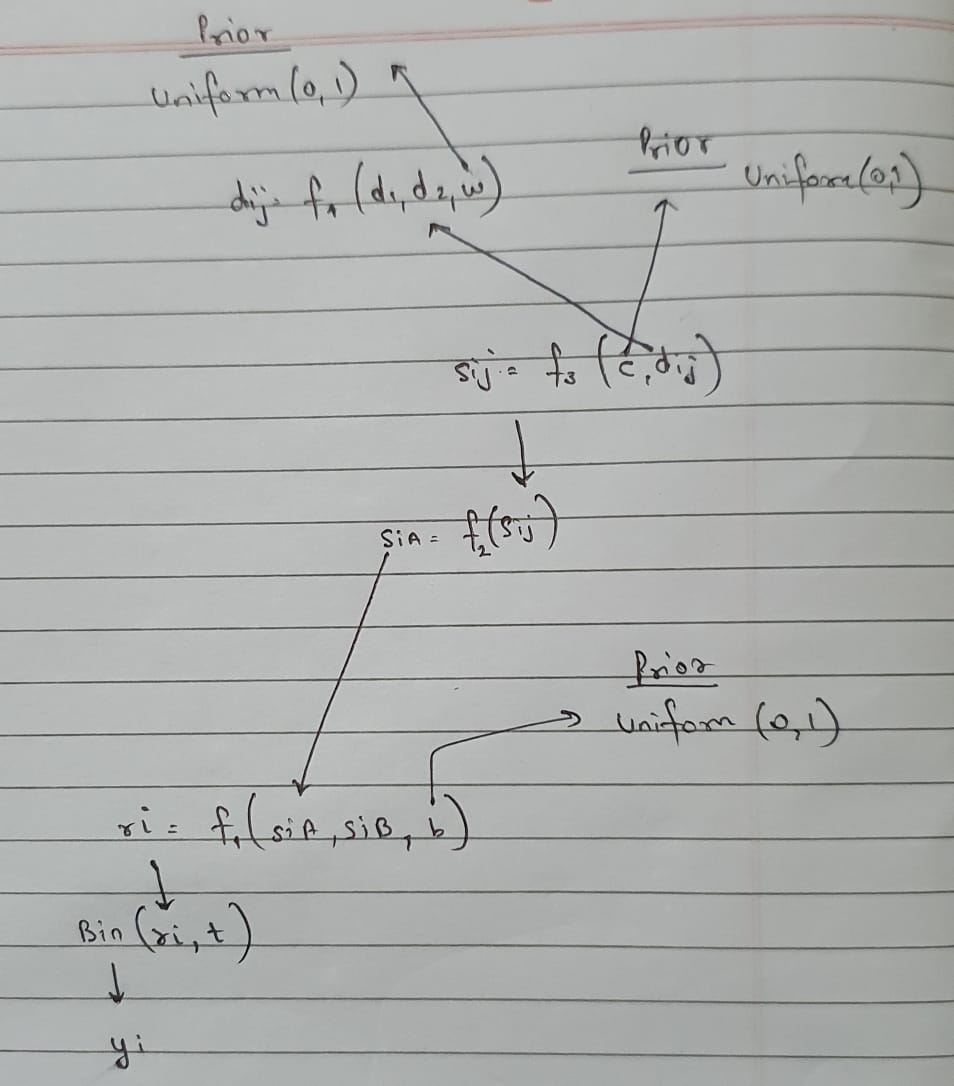

Part-B

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b, c, w]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 15 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f02d92b2c10>,
      dtype=object)

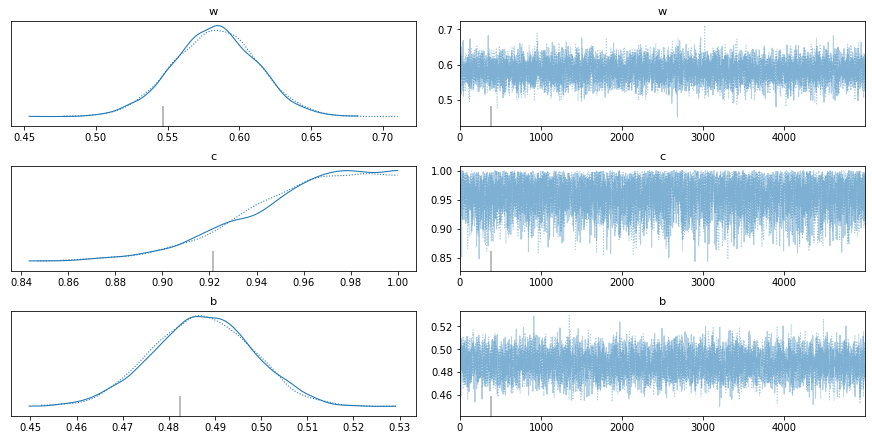

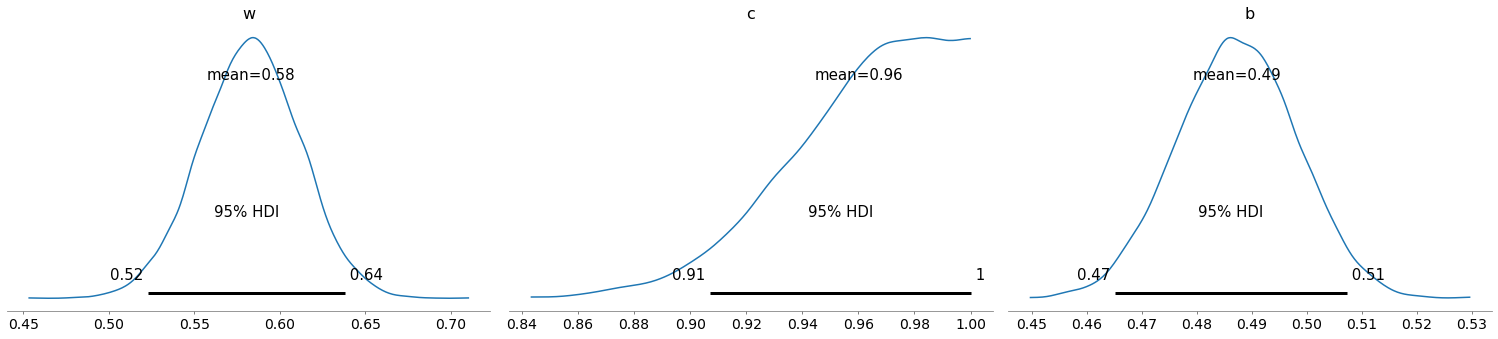

In [20]:
# Model and sampling
with pm.Model() as model:
  w = pm.Uniform('w',upper=1, lower=0)
  d=(w*d1)+((1-w)*d2)
  c=pm.Uniform('c',0,1)
  s=np.exp(-c*d)
  index_a=[[1],[1],[1],[0],[1],[0],[0],[0]]
  index_b=[[0],[0],[0],[1],[0],[1],[1],[1]]
  s_a= s.dot(np.array(index_a))
  s_b= s.dot(np.array(index_b))
  b= pm.Uniform("b", upper=1, lower=0)
  r=b*s_a/(b*s_a+(1-b)*s_b)
  y_cap=pm.Binomial("y_cap",p=r,n=n,observed=y)
  trace1= pm.sample(5000, random_seed=191118)
az.plot_trace(trace1)
az.plot_posterior(trace1, hdi_prob=0.95)

Part-C

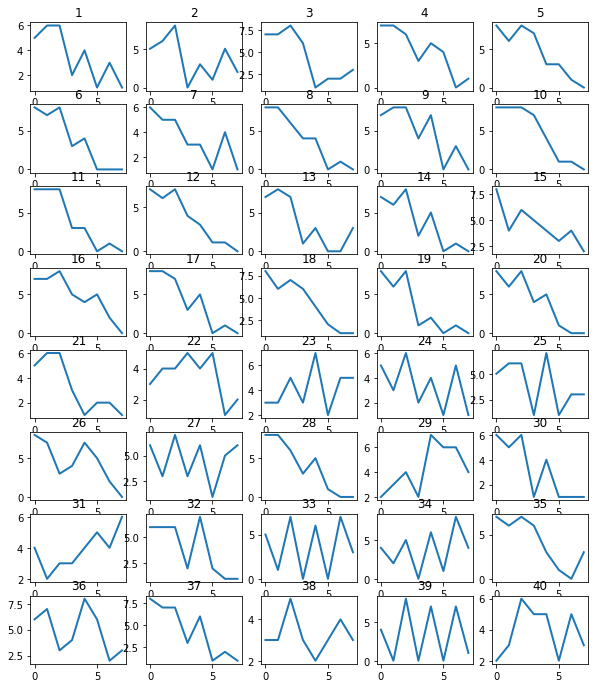

In [21]:
plt.figure(figsize=(10,60))
plt.title("Outcome of 40 subjects")
for i in range(1,41):
    plt.subplot(40,5, i)
    plt.plot(x[i-1],linewidth=2, markersize=12)
    plt.title(i)

In [22]:
#We divided the subjects into 2 groups-
#y_1 corresponding to decreasing behaviour of subjects
y_1=[x[2],x[3],x[4],x[5],x[6],x[7],x[9],x[10],x[11],x[14],x[15],x[16],x[17],x[18],x[19],x[20],x[25],x[27],x[34],x[36]]
#y_2 corresponding to Zic-Zac behaviour of subjects
y_2=[x[0],x[1],x[8],x[12],x[13],x[21],x[22],x[23],x[24],x[26],x[28],x[29],x[30],x[31],x[32],x[33],x[35],x[37],x[38],x[39]]

In [24]:
y1=[]
y2=[]
for i in range(8):
  sum1=0
  for j in range(len(y_1)):
    sum1+=y_1[j][i]
  y1.append([sum1])
for i in range(8):
  sum1=0
  for j in range(len(y_2)):
    sum1+=y_2[j][i]
  y2.append([sum1])
y1=np.array(y1)
y2=np.array(y2)


INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.7.10-64/lock_dir/lock
/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b, c, w]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 15 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f02e0666110>,
      dtype=object)

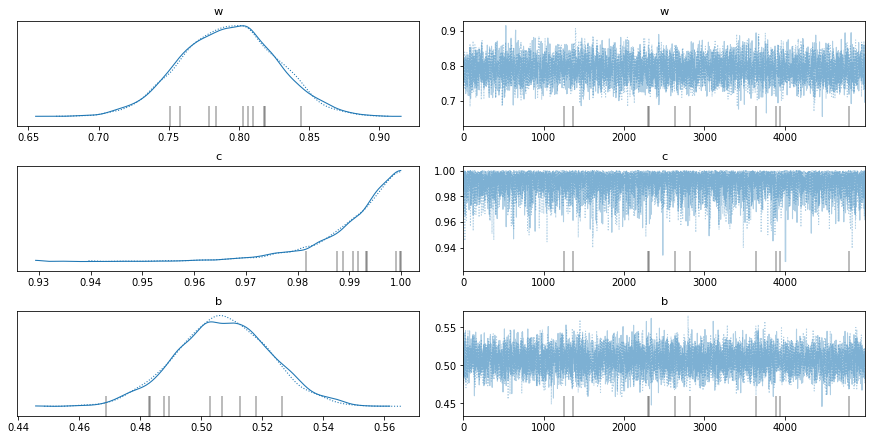

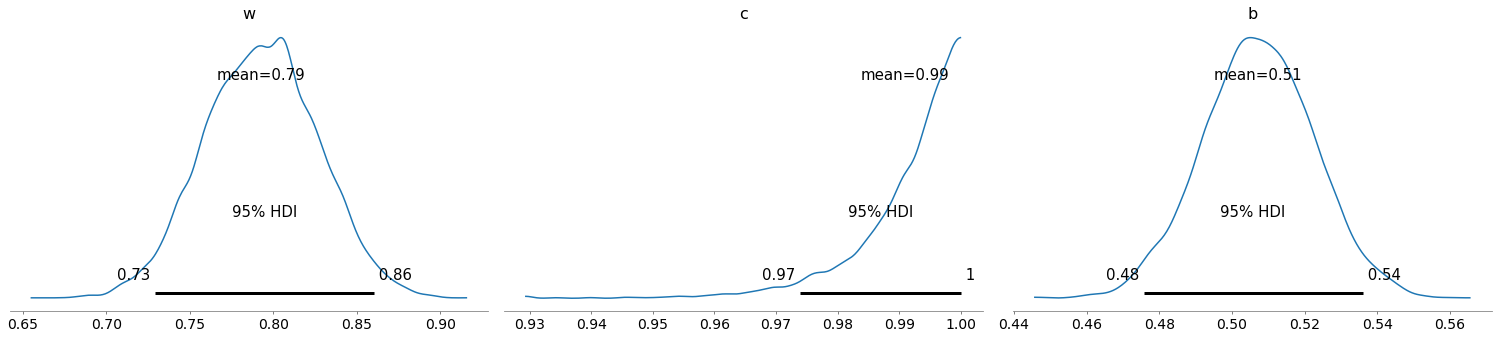

In [29]:
#model1 having decreasing behaviour
#n1= 20*8 =160
n1=160
with pm.Model() as model1:
  w = pm.Uniform('w',0,1)
  d=(w*d1)+((1-w)*d2)
  c=pm.Beta('c',alpha=4,beta=1)
  s=np.exp(-c*d)
  index_a=[[1],[1],[1],[0],[1],[0],[0],[0]]
  index_b=[[0],[0],[0],[1],[0],[1],[1],[1]]
  s_a= s.dot(np.array(index_a))
  s_b= s.dot(np.array(index_b))
  b= pm.Beta("b", alpha=2, beta=2)
  r=b*s_a/(b*s_a+(1-b)*s_b)
  y_cap=pm.Binomial("y_cap",p=r,n=n1,observed=y1)
  trace2= pm.sample(5000, random_seed=191118)
az.plot_trace(trace2)
az.plot_posterior(trace2, hdi_prob=0.95)

# In group 1 we are taking decreasing behaviour, so it has large obervation in front and small in end so on average bias 'b' is centered at 0.5 (beta(2,2))
# As we obseved that the prior 'c' is baised towards 1 so we are updating our prior as Beta(4,1) and 'w' as Beta(3,2)

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b, c, w]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 12 seconds.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f02cd7f0290>,
      dtype=object)

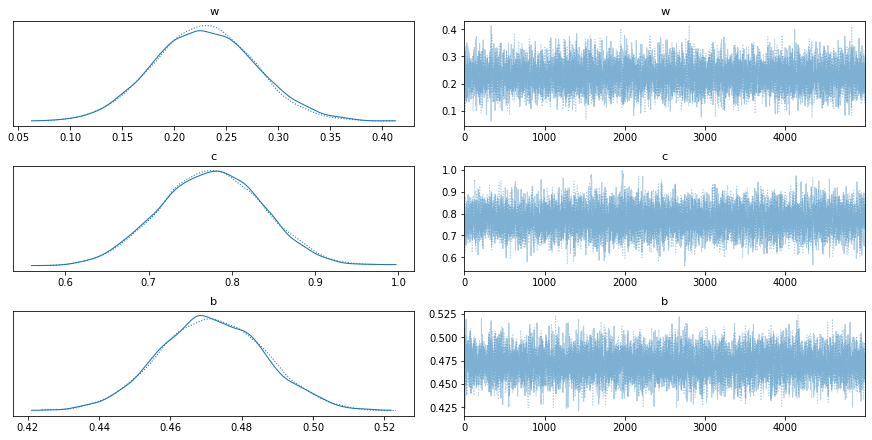

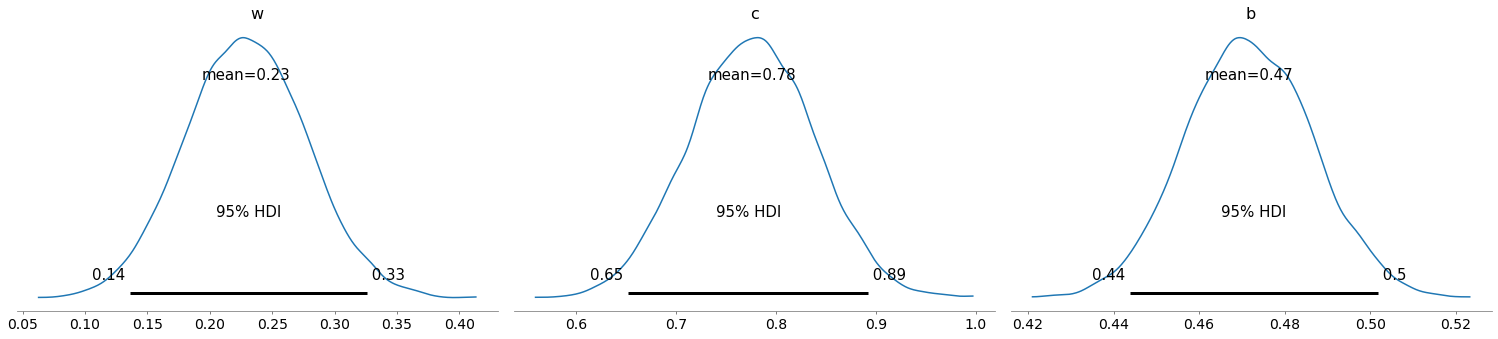

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


In [30]:
#model2 having decreasing behaviour
#n2= 20*8 =160
n2=160
with pm.Model() as model2:
  w = pm.Beta('w',alpha=2, beta=3)
  d=(w*d1)+((1-w)*d2)
  c=pm.Beta('c',alpha=4,beta=1)
  s=np.exp(-c*d)
  index_a=[[1],[1],[1],[0],[1],[0],[0],[0]]
  index_b=[[0],[0],[0],[1],[0],[1],[1],[1]]
  s_a= s.dot(np.array(index_a))
  s_b= s.dot(np.array(index_b))
  b= pm.Uniform("b", upper=1, lower=0)
  r=b*s_a/(b*s_a+(1-b)*s_b)
  y_cap=pm.Binomial("y_cap",p=r,n=n2,observed=y2)
  trace3= pm.sample(5000, random_seed=191118)
az.plot_trace(trace3)
az.plot_posterior(trace3, hdi_prob=0.95)

## In group 2 we are taking Zig-Zac behaviour, so it has large obervation and small observation mix together, so on average bias 'b' is centered at 0.5 (beta(2,2))
# As we obseved that the prior 'c' is baised towards 1 so we are updating our prior as Beta(4,1) and 'w' as Beta(3,2)

Part-D


/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [c, w]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 11 seconds.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 26 divergences after tuning. Increase `target_accept` or reparameterize.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f02dfb34950>,
      dtype=object)

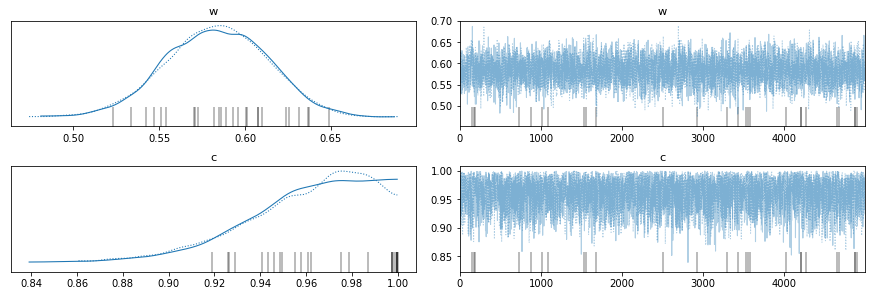

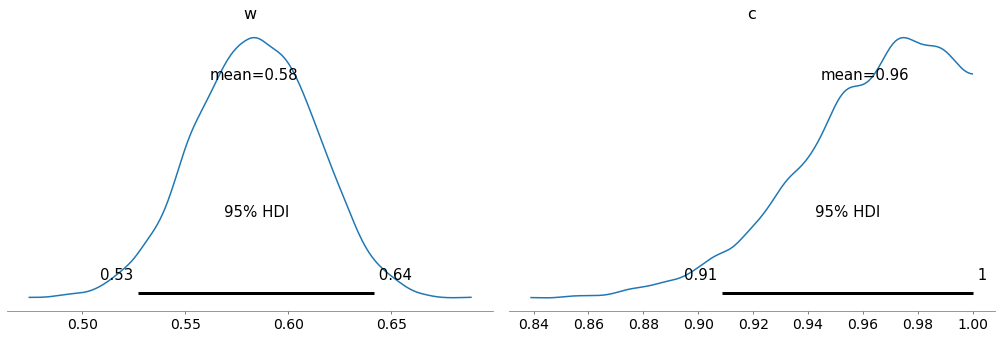

In [11]:
# taking b as 0.5 
with pm.Model() as model3:
  w = pm.Uniform('w',upper=1, lower=0)
  d=(w*d1)+((1-w)*d2)
  c=pm.Beta('c',alpha=4,beta=1)
  s=np.exp(-c*d)
  index_a=[[1],[1],[1],[0],[1],[0],[0],[0]]
  index_b=[[0],[0],[0],[1],[0],[1],[1],[1]]
  s_a= s.dot(np.array(index_a))
  s_b= s.dot(np.array(index_b))
  b= 0.5
  r=b*s_a/(b*s_a+(1-b)*s_b)
  y_cap=pm.Binomial("y_cap",p=r,n=n,observed=y)
  trace4= pm.sample(5000, random_seed=191118)
az.plot_trace(trace4)
az.plot_posterior(trace4, hdi_prob=0.95)

# We can see in the b part when we took the non informative prior on beta, the peak (after observing the data) was centered at 0.5
#(using the data we got the value of free parameter centered at 0.5, unbiased) So b=0.5 is a good choice
# We can observe that in the grouping also, the 2 models after observing the likelihood, 'b' was centered at 0.5 so it is a good choice.

Part-E

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b, c, w]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 15 seconds.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


posterior predictive variable y_cap's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


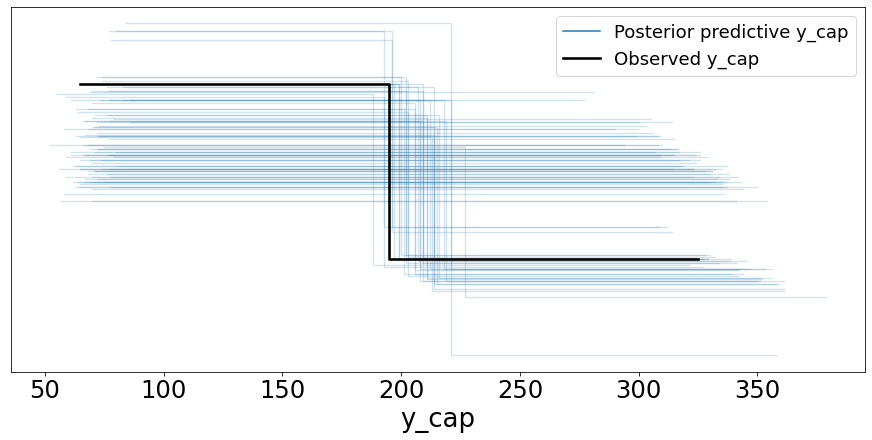

In [13]:
#using binomial distribution 
with pm.Model() as model4:
  w = pm.Uniform('w',upper=1, lower=0)
  d=(w*d1)+((1-w)*d2)
  c=pm.Beta('c',alpha=4,beta=1)
  s=np.exp(-c*d)
  index_a=[[1],[1],[1],[0],[1],[0],[0],[0]]
  index_b=[[0],[0],[0],[1],[0],[1],[1],[1]]
  s_a= s.dot(np.array(index_a))
  s_b= s.dot(np.array(index_b))
  b= pm.Beta('b',alpha=4,beta=4)
  r=b*s_a/(b*s_a+(1-b)*s_b)
  y_cap=pm.Binomial("y_cap",p=r,n=n,observed=y)
  trace5= pm.sample(5000, random_seed=191118)
y_pred = pm.sample_posterior_predictive(trace5, 100, model4, random_seed=191118)
data_ppc = az.from_pymc3(model=model4, trace=trace5, posterior_predictive=y_pred)
ax = az.plot_ppc(data_ppc, figsize=(12, 6), mean=False)

INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.7.10-64/lock_dir/lock
/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b, c, w]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 16 seconds.
/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


posterior predictive variable y_cap's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


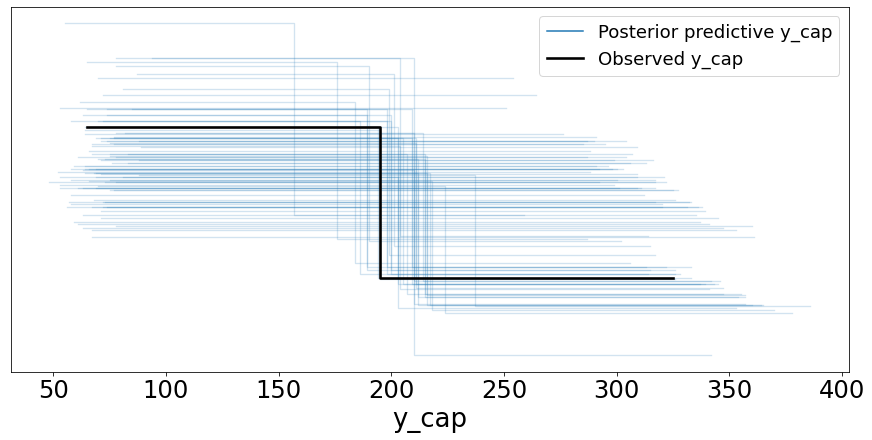

In [19]:
#Using poisson distribution
with pm.Model() as model4:
  w = pm.Uniform('w',upper=1, lower=0)
  d=(w*d1)+((1-w)*d2)
  c=pm.Beta('c',alpha=4,beta=1)
  s=np.exp(-c*d)
  index_a=[[1],[1],[1],[0],[1],[0],[0],[0]]
  index_b=[[0],[0],[0],[1],[0],[1],[1],[1]]
  s_a= s.dot(np.array(index_a))
  s_b= s.dot(np.array(index_b))
  b= pm.Beta('b',alpha=4,beta=4)
  r=b*s_a/(b*s_a+(1-b)*s_b)
  y_cap=pm.Poisson("y_cap",r*n,observed=y)
  trace5= pm.sample(5000, random_seed=191118)
y_pred = pm.sample_posterior_predictive(trace5, 100, model4, random_seed=191118)
data_ppc = az.from_pymc3(model=model4, trace=trace5, posterior_predictive=y_pred)
ax = az.plot_ppc(data_ppc, figsize=(12, 6), mean=False)

INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.7.10-64/lock_dir/lock
/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b, c, w]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 16 seconds.
/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


posterior predictive variable y_cap's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


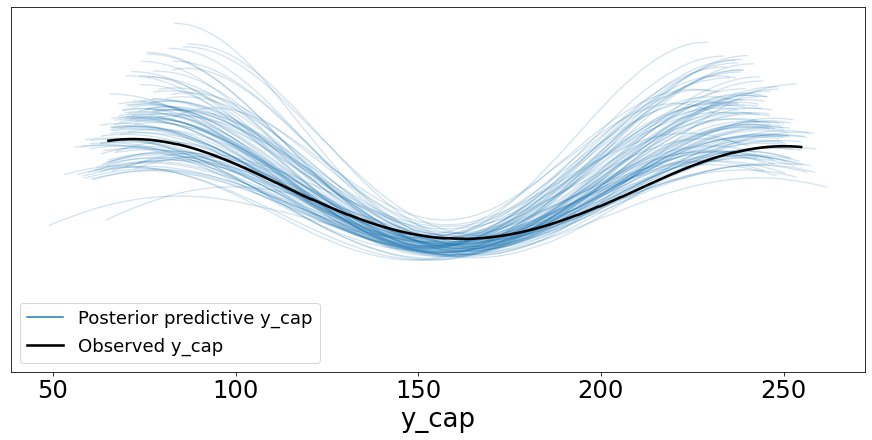

In [48]:
#using Normal distribution
with pm.Model() as model4:
  w = pm.Uniform('w',upper=1, lower=0)
  d=(w*d1)+((1-w)*d2)
  c=pm.Beta('c',alpha=4,beta=1)
  s=np.exp(-c*d)
  index_a=[[1],[1],[1],[0],[1],[0],[0],[0]]
  index_b=[[0],[0],[0],[1],[0],[1],[1],[1]]
  s_a= s.dot(np.array(index_a))
  s_b= s.dot(np.array(index_b))
  b= pm.Beta('b',alpha=4,beta=4)
  r=b*s_a/(b*s_a+(1-b)*s_b)
  y_cap=pm.Normal("y_cap",mu=n*r,sd=np.sqrt(n*r*(1-r)),observed=y)
  trace5= pm.sample(5000, random_seed=191118)
y_pred = pm.sample_posterior_predictive(trace5, 100, model4, random_seed=191118)
data_ppc = az.from_pymc3(model=model4, trace=trace5, posterior_predictive=y_pred)
ax = az.plot_ppc(data_ppc, figsize=(12, 6), mean=False)

Answer(e)= There is an equal competition between poisson and binomial distribution. But when normal distribution is used, observed y perfectly overlap the predicted y.
So, it is the best model.
